In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
# Import data from CSV file
data=np.loadtxt('data.csv',delimiter=',')
X=data[:,:-1]
y=data[:,-1]

In [25]:
def mse(X,y,W,b,learning_rate=0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    # compute errors
    y_pred=np.matmul(X,W)+b
    error=y-y_pred
    
    # compute steps
    W_new=W+np.matmul(error,X)*learning_rate
    b_new=b+error.sum()*learning_rate
    return W_new,b_new

In [26]:
def minibatch(X,y,batch_size=20,num_iterations=25):
    data_len=X.shape[0]
    W=np.zeros(X.shape[1])
    b=0
    reg_coff=[np.hstack((W,b))]
    for _ in range(num_iterations):
        batch=np.random.choice(data_len,batch_size)
        X_batch=X[batch,:]
        y_batch=y[batch]
        W,b=mse(X_batch,y_batch,W,b)
        reg_coff.append(np.hstack((W,b)))
    return reg_coff    
        
    

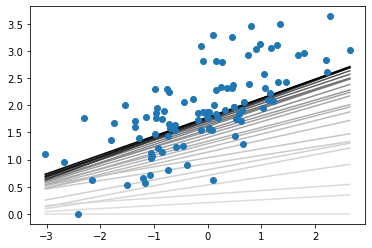

In [27]:
reg_coff = minibatch(X, y)


# Plot the regression coefficient
plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(reg_coff)
for W, b in reg_coff:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()